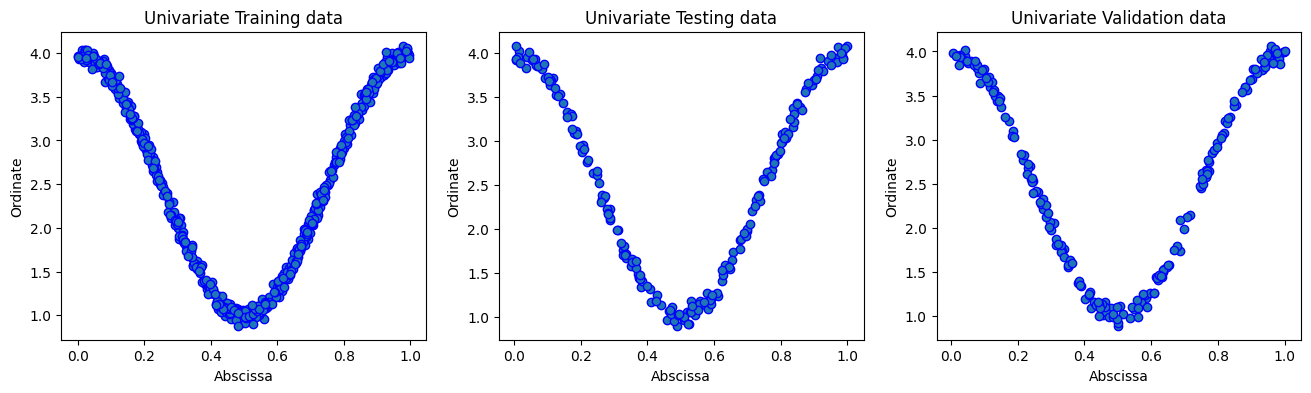

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv(r"C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Data\Regression\UnivariateData\12.csv")
data = df.to_numpy(dtype=float)

# Split the data into training and testing sets
np.random.seed(42)
np.random.shuffle(data)

# Split the data into training,Validation & testing sets
train = data[:int(0.6*len(data))]
Validate = data[int(0.6*len(data)):int(0.8*len(data))]
test = data[int(0.8*len(data)):]
fig,axis =plt.subplots(1,3,figsize=(16,4))
axis[0].scatter(train[:, 0], train[:, 1],edgecolors="blue",cmap="set1")
axis[0].set_title('Univariate Training data')
axis[0].set_xlabel("Abscissa")
axis[0].set_ylabel("Ordinate")
axis[1].scatter(test[:, 0], test[:, 1],edgecolors="blue",cmap="set1")
axis[1].set_title('Univariate Testing data')
axis[1].set_xlabel("Abscissa")
axis[1].set_ylabel("Ordinate")
axis[2].scatter(Validate[:, 0], Validate[:, 1],edgecolors="blue",cmap="set1")
axis[2].set_title('Univariate Validation data')
axis[2].set_xlabel("Abscissa")
axis[2].set_ylabel("Ordinate")
plt.show()
# print(train)

In [3]:
def Leaky_Relu(x):
    if x>=0:
        return x
    else:
        return 0.01*x

def Relu(x):
    return max(0,x)

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Update_Weight(Weight,N_In,N_Out,Yn):
    Learning_Rate=0.03
    Delta_W = Learning_Rate*np.outer(N_In,(Yn-N_Out))
    # Weight=np.add(Weight,Delta_W,out=Weight, casting='unsafe')
    Weight=Weight+Delta_W
    return Weight


#Assuming 1 hidden layers,Generalize it afterwards
def Perceptron(Data,Epoch, Learning_Rate):
         
    # W_o=np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1]])    # 3 Neurons in Output Layer
    # W_h=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])        # 5 Neurons in Hidden Layer
    
    W_h=np.random.randn(2,10)
    W_o=np.random.randn(10,1)

    Avg_Errors=[]
    MSE=[]
    # Learning_Rate=0.01
    while(Epoch):
        Errors=[]
        H1=[]
        for i in range(len(Data)):
            # In_H1=np.concatenate([1],Data[i,:], axis=0) #Inputs to Input Layer
            In_H1=np.array([1,*Data[i,:-1]]) #Inputs to Input Layer
            Out_H1=np.matmul(W_h.T, In_H1) #Hidden Layer Output
            H1.append(Out_H1)
            # print(Out_H1) #Debug
            Out_H1 = Sigmoid(Out_H1)
            Y_pred=np.matmul(Out_H1,W_o) #Output of FCNN          
            Y_GT=Data[i,-1:]           
            Error=0.5*(Y_GT-Y_pred)**2
            Errors.append(Error)

            #Weight Updation
            W_o = W_o + (Learning_Rate * np.outer(Y_pred, (Y_GT-Y_pred)))
            # print(W_o)
            var1 = np.matmul(W_o, (Y_GT-Y_pred))
            var2 = Out_H1*(1-Out_H1)
            W_h = W_h + (Learning_Rate*np.outer(In_H1,var1*var2))
        
        Epoch-=1
        Avg_Error=np.mean(Errors)
        Avg_Errors.append(Avg_Error)
        MSE.append(np.sqrt(np.mean(Errors)))
    return W_o,W_h,Avg_Errors,MSE,H1

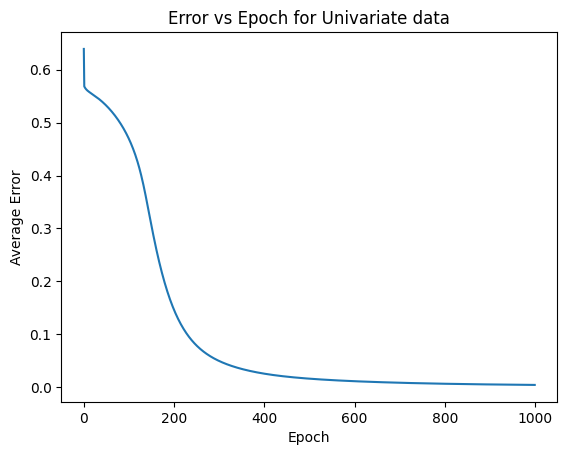

In [5]:
np.random.seed(10)

W_o,W_h,Avg_Errors,MSE,H1 = Perceptron(train,1000, 0.0025)

plt.plot(Avg_Errors)
plt.title("Error vs Epoch for Univariate data")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()

Text(0.5, 0.92, '10th Neuron')

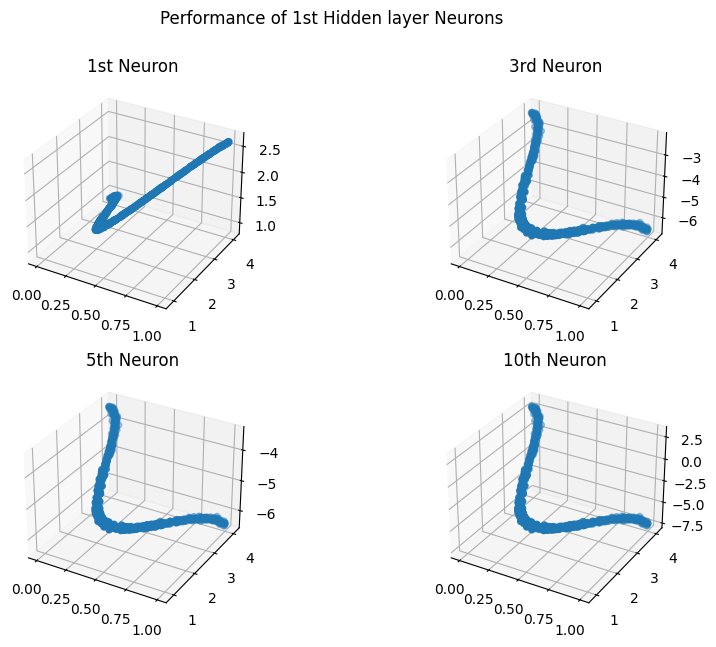

In [7]:
H1=np.array(H1)

plt.figure(figsize=(10, 7))
plt.suptitle("Performance of 1st Hidden layer Neurons")
ax = plt.subplot(2, 2, 1,projection='3d')
ax.scatter(train[:,0],train[:,1],H1[:,0])
ax.set_title("1st Neuron")

ax = plt.subplot(2, 2, 2,projection='3d')
ax.scatter(train[:,0],train[:,1],H1[:,2])
ax.set_title("3rd Neuron")

ax = plt.subplot(2, 2, 3,projection='3d')
ax.scatter(train[:,0],train[:,1],H1[:,4])
ax.set_title("5th Neuron")

ax = plt.subplot(2, 2, 4,projection='3d')
ax.scatter(train[:,0],train[:,1],H1[:,9])
ax.set_title("10th Neuron")

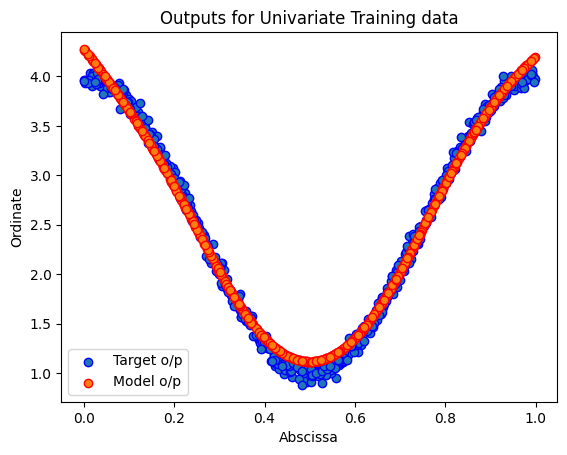

In [ ]:
train_op=[]
for i in train[:,0]:
    O1=np.matmul(np.array([1,i]),W_h)
    O1 = Sigmoid(O1)
    O2=np.matmul(O1,W_o)
    train_op.append(O2)
    
plt.scatter(train[:, 0], train[:, 1],edgecolors="blue")
plt.scatter(train[:, 0], train_op,edgecolors="red")
plt.legend(['Target o/p', 'Model o/p'])
plt.title('Outputs for Univariate Training data')
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.show()

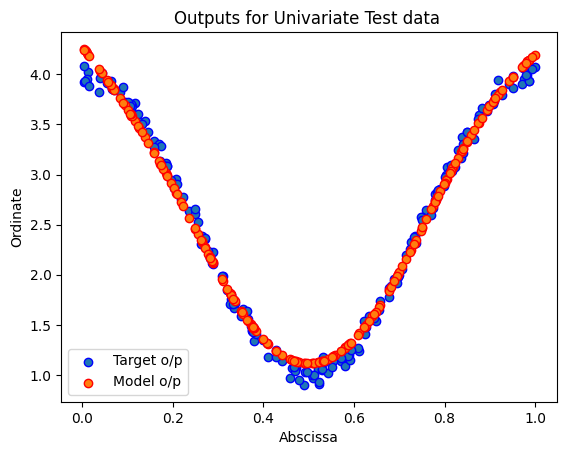

In [ ]:

test_op=[]
for i in test[:,0]:
    O1=np.matmul(np.array([1,i]),W_h)
    O1 = Sigmoid(O1)
    O2=np.matmul(O1,W_o)
    test_op.append(O2)
    
plt.scatter(test[:, 0], test[:, 1],edgecolors="blue")
plt.scatter(test[:, 0], test_op,edgecolors="red")
plt.legend(['Target o/p', 'Model o/p'])
plt.title('Outputs for Univariate Test data ')
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.show()

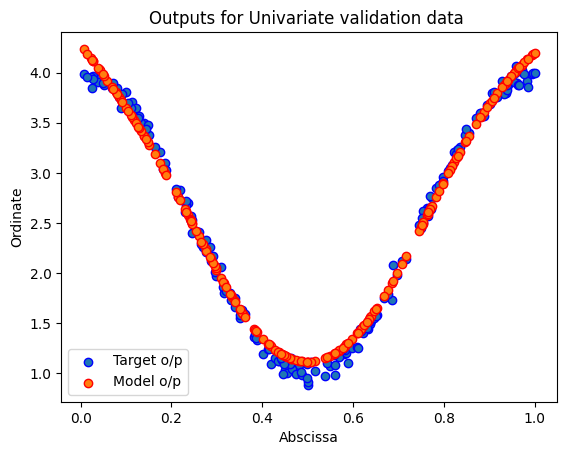

In [ ]:
validation_op=[]
for i in Validate[:,0]:
    O1=np.matmul(np.array([1,i]),W_h)
    O1 = Sigmoid(O1)
    O2=np.matmul(O1,W_o)
    validation_op.append(O2)
    
plt.scatter(Validate[:, 0], Validate[:, 1],edgecolors="blue")
plt.scatter(Validate[:, 0], validation_op,edgecolors="red")
plt.legend(['Target o/p', 'Model o/p'])
plt.title('Outputs for Univariate validation data ')
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.show()

<BarContainer object of 3 artists>

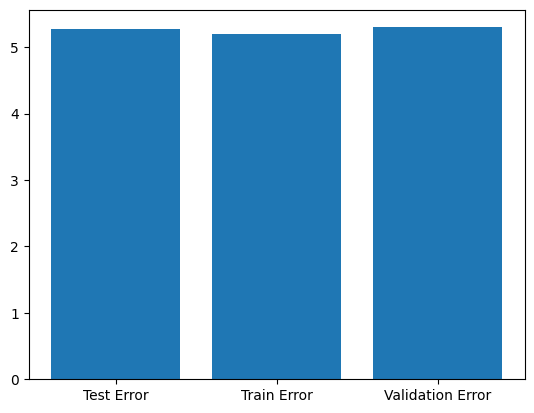

In [ ]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(test[:,0], test_op)
mse_train = mean_squared_error(train[:,0],train_op)
mse_validation = mean_squared_error(Validate[:,0],validation_op)

plt.bar(["Test Error","Train Error","Validation Error"],[mse_test,mse_train,mse_validation])
# plt.title("Mean Square Error for Training & Testing data ")


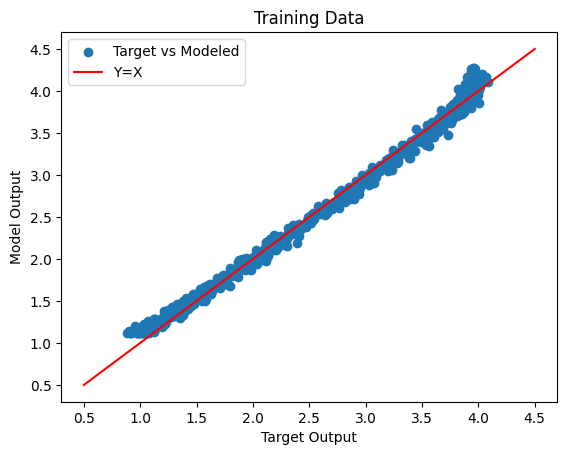

In [ ]:
plt.scatter(train[:,1],train_op,label='Target vs Modeled')
plt.plot([0.5,4.5] , [0.5,4.5] , color = 'r' , label = 'Y=X')
plt.title("Training Data")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.legend()

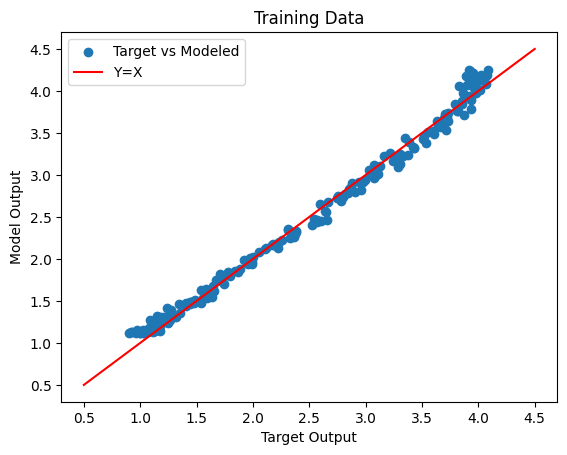

In [ ]:
plt.scatter(test[:,1],test_op,label='Target vs Modeled')
plt.plot([0.5,4.5] , [0.5,4.5] , color = 'r' , label = 'Y=X')
plt.title("Training Data")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.legend()

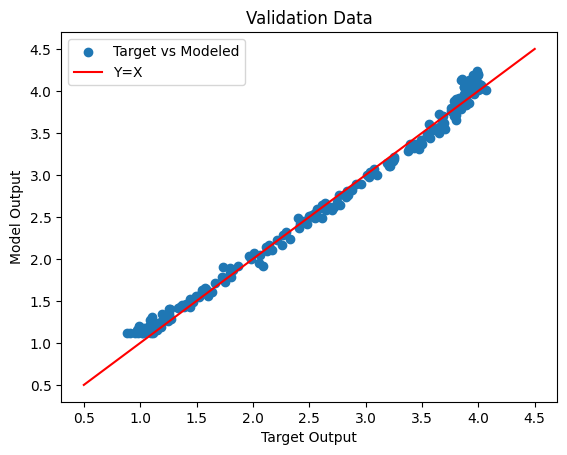

In [ ]:
plt.scatter(Validate[:,1],validation_op,label='Target vs Modeled')
plt.plot([0.5,4.5] , [0.5,4.5] , color = 'r' , label = 'Y=X')
plt.title("Validation Data")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.legend()